# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [5]:
import tensorflow as tf

## Get the dataset

In [6]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [8]:
# Pre processing 
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8000, 28, 28) (8000,) (2000, 28, 28) (2000,)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Visualize the dataset
Print some images with labels.

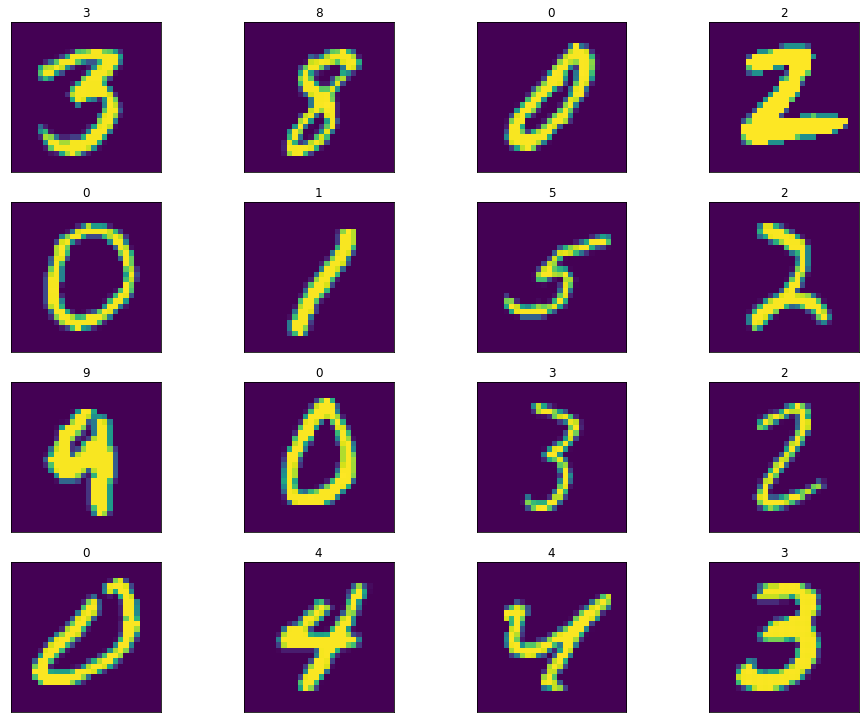

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
for i in range (16):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.title(Y_train[i])


# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

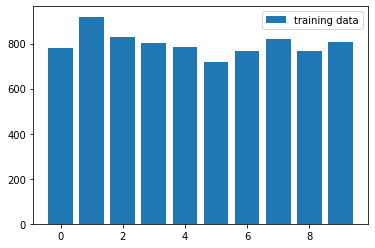

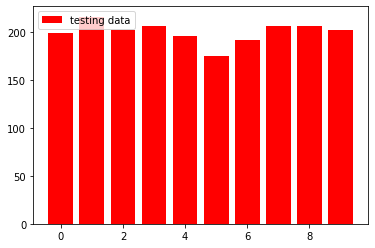

In [10]:
import numpy as np

x, y = np.unique(Y_train, return_counts=True)
plt.bar(x,y,label='training data')
plt.legend()
plt.show()
x, y = np.unique(Y_test, return_counts=True)
plt.bar(x,y,label='testing data', color='red')
plt.legend()
plt.show()
# Your code

## Model

In [11]:
# model building

import keras
from keras.models import Sequential
from keras import layers

model=keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [12]:
# Compile the model (add optimizers and metrics)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Fit the model on the training data (specify validation_split, read about validation if new to you)

history = model.fit(X_train, Y_train, epochs=45, validation_split=0.2)

Epoch 1/45


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 12s 5ms/step - loss: 1.5824 - accuracy: 0.7589 - val_loss: 0.1389 - val_accuracy: 0.9563
Epoch 2/45
200/200 [==============================] - 1s 4ms/step - loss: 0.2867 - accuracy: 0.9131 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 3/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1879 - accuracy: 0.9402 - val_loss: 0.0739 - val_accuracy: 0.9762
Epoch 4/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1549 - accuracy: 0.9516 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch 5/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1305 - accuracy: 0.9602 - val_loss: 0.0604 - val_accuracy: 0.9850
Epoch 6/45
200/200 [==============================] - 1s 4ms/step - loss: 0.1103 - accuracy: 0.9638 - val_loss: 0.0562 - val_accuracy: 0.9844
Epoch 7/45
200/200 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9691 - val_loss: 0.0658 - val_accuracy: 0.9812
Epoch 8/45
200/2

## Predict some images
Print the image along with its label (true value) and predicted value.

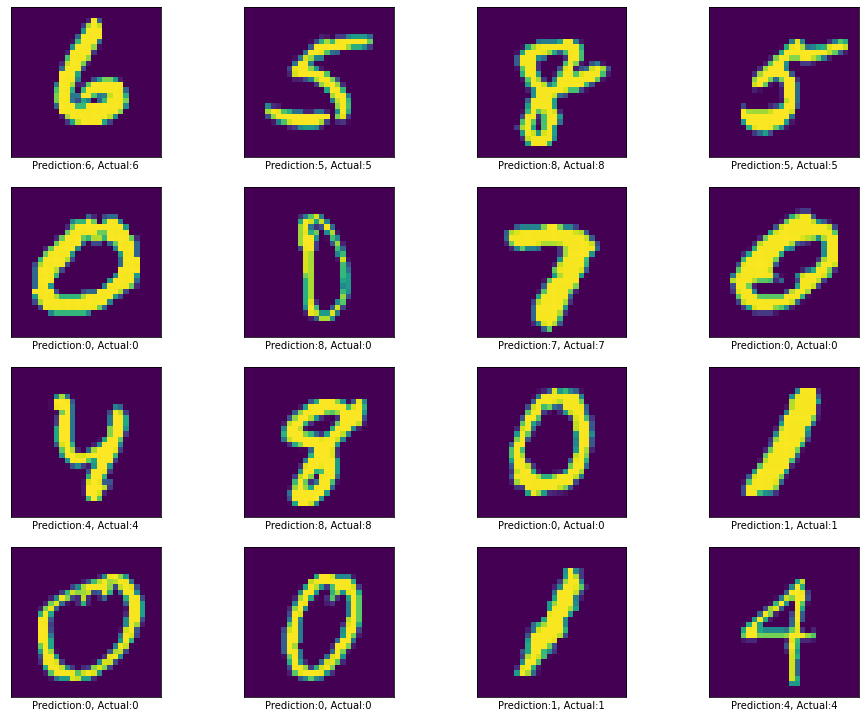

In [19]:
# Your code

pred=np.argmax(model.predict(X_test),axis=1)
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(5,4,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i])
  plt.xlabel("Prediction:{}, Actual:{}".format(pred[i],Y_test[i]))